In [18]:
import numpy as np
np.__version__

'1.20.3'

In [19]:
import pandas as pd
pd.__version__

'1.3.4'

In [20]:
import matplotlib as mp
mp.__version__

'3.4.3'

In [21]:
import sklearn
sklearn.__version__

'0.24.2'

In [22]:
data = pd.read_csv('Sample.txt' , header = None)
data

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [23]:
X= data[0]
y = data[1]

In [24]:
# Splitting and Normalization

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
RandomState = 42

In [27]:
#Splitting of training and testing data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = RandomState)

In [29]:
np.save("X_train.npy",X_train)
np.save("X_test.npy",X_test)
np.save("y_train.npy",y_train)
np.save("y_test.npy",y_test)

In [30]:
#Normalization

In [31]:
X_train = np.asarray(X_train).reshape(-1,1)
X_test = np.asarray(X_test).reshape(-1,1)

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Normalized = scaler.transform(X_train)

In [33]:
X_test_Normalized = scaler.transform(X_test)


In [34]:
X_test_Normalized

array([[ 3.5846748 ],
       [-0.74521085],
       [-0.7728999 ],
       [-0.46621978],
       [-0.80481733],
       [ 0.44468181],
       [ 2.95178219],
       [ 0.97372001],
       [-0.66233465],
       [-0.55337892],
       [-0.42262658],
       [-0.43394772],
       [-0.63759182],
       [ 1.27925437],
       [-0.08563855],
       [-0.62166039],
       [-0.72251401],
       [-0.65597845],
       [-0.84000834],
       [-0.24899031]])

In [35]:
import pickle
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler, f)

In [38]:
 with open('C:\Users\student\Desktop\scaler.pkl','rb') as f

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_11960/3097082155.py, line 1)

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_Normalized, y_train)
Score = reg.score(X_train_Normalized, y_train)
CoEfficient = reg.coef_
Intercept = reg.intercept_


In [40]:
 Predictions = reg.predict(X_test_Normalized)


In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test, Predictions)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_test, Predictions) #default=True
rmse = mean_squared_error(y_test, Predictions,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 2.4849697479798394
MSE: 15.709362447765182
RMSE: 3.9635038094803416


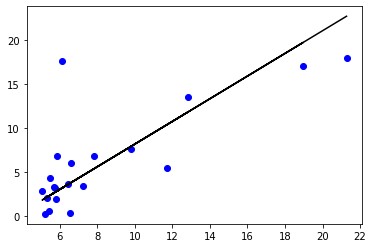

In [42]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, Predictions, color ='k')
plt.show()
